# Distributed Cluster Testing

In [6]:
import dask
import dask.array as da
from dask.distributed import Client
import os
import zarr
import matplotlib.pyplot as plt
import time

In [16]:
root = zarr.open('/Users/tnonet/Documents/SNP_matrices/20K_80K.zarr/', mode='r')
snp_zarr_array = da.from_zarr(root)

In [23]:
client.close()

In [26]:
def shape(v1):
    k, p = v1.shape if v1.shape[0] < v1.shape[1] else v1.T.shape
    return k, p

In [28]:
shape(snp_zarr_array.T)

(20000, 80000)

tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 1 memory: 124 MB fds: 157>>
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 907, in _run
    return self.callback()
  File "//anaconda3/lib/python3.7/site-packages/distributed/system_monitor.py", line 65, in update
    read_bytes = (ioc.bytes_recv - last.bytes_recv) / (duration or 0.5)
AttributeError: 'NoneType' object has no attribute 'bytes_recv'
tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 10 memory: 228 MB fds: 157>>
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 907, in _run
    return self.callback()
  File "//anaconda3/lib/python3.7/site-packages/distributed/system_monitor.py", line 65, in update
    read_bytes = (ioc.bytes_recv - last.bytes_recv) / (duration or 0.5)
AttributeError: 'No

In [24]:
client = Client(n_workers=2, 
                threads_per_worker=1,
                memory_limit='4GB')

In [20]:
def PM(array, k=2, b=10, iters=2):
    n, p = array.shape
    
    x = da.random.normal(size=(p, k+b))
    for _ in range(iters-1):
        xp = array.T.dot(array.dot(x))
        x, _ = da.linalg.tsqr(xp)
        x = x.persist()
        
    x = array.dot(x)
    
    return dask.compute(da.linalg.tsqr(x, compute_svd=True))[0]

In [25]:
start = time.time()
U, S, V = PM(snp_zarr_array)
print(time.time() - start)

17.51203989982605


In [21]:
start = time.time()
U, S, V = PM(snp_zarr_array)
print(time.time() - start)

29.52586579322815


In [55]:
Up, Sp, Vp = da.linalg.tsqr(snp_zarr_array[:,0:5000], compute_svd=True)

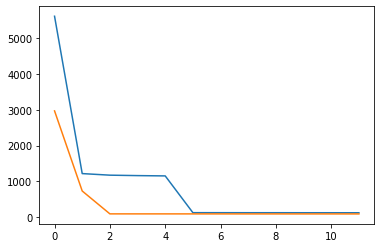

In [56]:
plt.plot(S)
plt.plot(Sp.compute()[0:12])